## Objectif : Prédire si une enchère est effectué par un robot ou par un humain 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore", category=UserWarning)

**Objectif :** se mettre à l’aise avec le dataset et comprendre au maximum nos différentes variables pour ensuite définir une stratégie de modélisation. Qu’est-ce qu’on va faire avec nos données pour atteindre notre objectif ?
Checklist de base (Non-exhaustive) :

**Analyse de la forme :**
- **Identification de la Target :** 
    - outcome (0=>1910 / 1=>103)
- **Nombre de lignes et de colonnes :**(2013 Lignes, 10 Colonnes)
- **Types de variables :** 
    - 5 Quantitatives, 5 Qualitatives
- **Analyse des valeurs manquantes :** 
    - 0 valeurs manquantes déja remplie dans la phase de Feature Extraction.

**Analyse du fond :**
- **Visualisation de la Target :** 
    - 5% d'enchère robotique (103/1910)
- **Compréhension des différentes variables (Internet) :** 
    - Connaitre les variables qui définit bien notre Target.
- **Visualisation des relations Features – Target (Histogrammes/Boxplot) :**
    - outcome / most_frequent_merchandise: D'après l'histogramme, il apparait que les catégories "mobile", "jewerly" et "sporting" good sont les plus dominantes pour un outcome qui égale à 0.En revanche, la classe 1 demande beaucoup moins les objets "mobile", "sporting goods" et "home goods".Une autre remarque les produits de types "clothing", "furniture" et "auto parts" sont exclusivement de classe 0 pendant les enchères. 
    - outcome / most_frequent_country: IN(Inde),ID(Indonésie) sont les pays qui domminent la plupart des transactions;l'Inde avec un maximum pour la classe 0.za(Afrique du Sud) et us(Etat-Unis) viennet en deuxième lieu avec un nombre disant important pour la classe 1 après le th(THAÏLANDE) et au(l'australie).
- **Identification des outliers :**
    - il y a un nombre important des valeurs abérantes. 


In [3]:
train = pd.read_excel('new_train.xlsx')

In [4]:
train

,bidder_id,payment_account,address,outcome,total_bids,unique_auctions,avg_time_between_bids,most_frequent_merchandise,most_frequent_country,unique_device_ratio
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,24,18,5.711121e+11,home goods,ke,0.583333
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0,3,1,3.233579e+12,office equipment,id,0.666667
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0,4,4,2.379000e+12,sporting goods,id,0.500000
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0,1,1,0.000000e+00,books and music,my,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0,155,23,7.777888e+10,office equipment,in,0.341935
...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0,36,25,2.099162e+12,mobile,uk,0.111111
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0,1,1,0.000000e+00,mobile,ua,1.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0,2,1,9.798474e+12,mobile,id,1.000000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0,1,1,0.000000e+00,office equipment,sa,1.000000


In [5]:
train['outcome'].value_counts()

outcome
0    1910
1     103
Name: count, dtype: int64

In [6]:
train.shape

(2013, 10)

In [7]:
train.dtypes

bidder_id                     object
payment_account               object
address                       object
outcome                        int64
total_bids                     int64
unique_auctions                int64
avg_time_between_bids        float64
most_frequent_merchandise     object
most_frequent_country         object
unique_device_ratio          float64
dtype: object

<Axes: ylabel='count'>

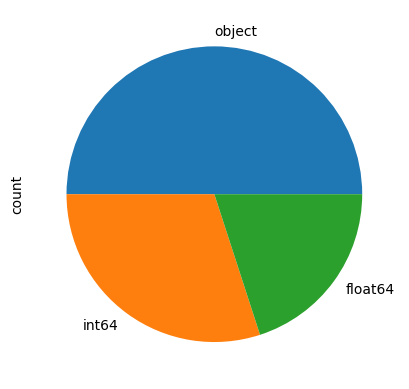

In [8]:
train.dtypes.value_counts().plot.pie()

<Axes: >

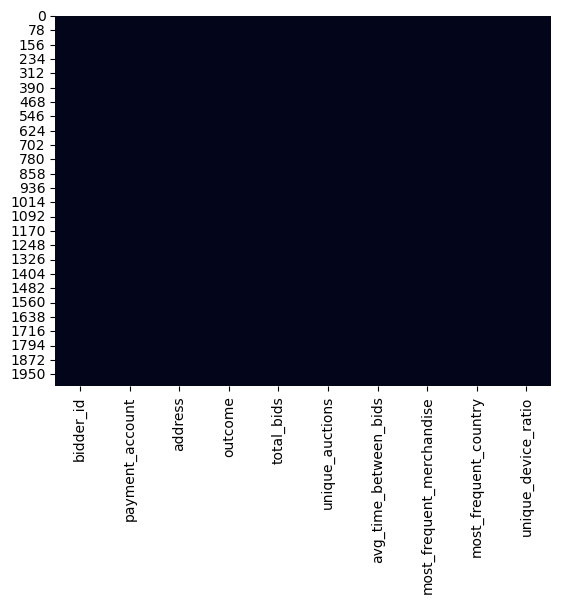

In [9]:
sns.heatmap(train.isna(),cbar=False)

# Analyse du fond
## Visualisation de la target (outcome)

<Axes: xlabel='outcome', ylabel='count'>

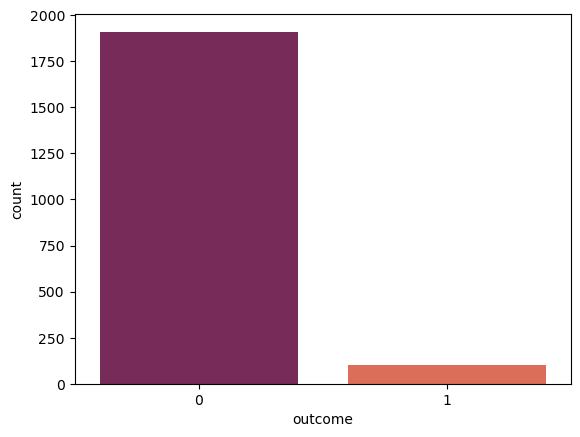

In [10]:
sns.countplot(x='outcome',data=train, palette='rocket')

In [11]:
train['outcome'].value_counts()

outcome
0    1910
1     103
Name: count, dtype: int64

In [12]:
train

,bidder_id,payment_account,address,outcome,total_bids,unique_auctions,avg_time_between_bids,most_frequent_merchandise,most_frequent_country,unique_device_ratio
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,24,18,5.711121e+11,home goods,ke,0.583333
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0,3,1,3.233579e+12,office equipment,id,0.666667
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0,4,4,2.379000e+12,sporting goods,id,0.500000
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0,1,1,0.000000e+00,books and music,my,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0,155,23,7.777888e+10,office equipment,in,0.341935
...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0,36,25,2.099162e+12,mobile,uk,0.111111
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0,1,1,0.000000e+00,mobile,ua,1.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0,2,1,9.798474e+12,mobile,id,1.000000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0,1,1,0.000000e+00,office equipment,sa,1.000000


# Distrubution des variables continues

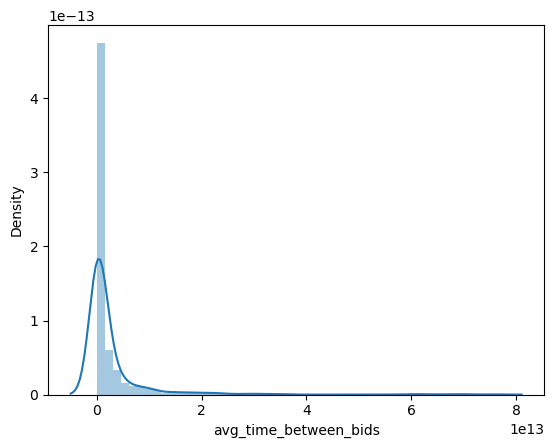

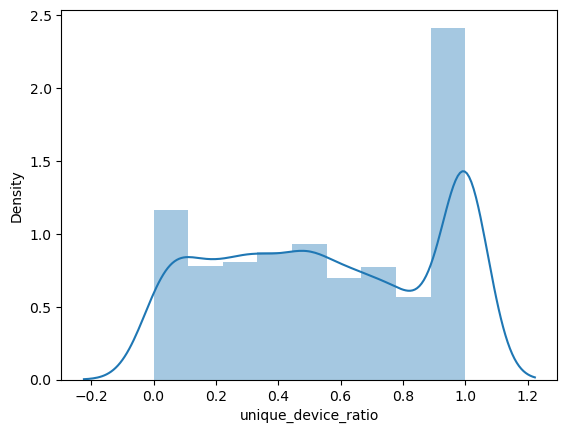

In [13]:
for col in train.select_dtypes('float'):
    plt.figure()
    sns.distplot(train[col])

<Axes: title={'center': 'most_frequent_country'}, ylabel='count'>

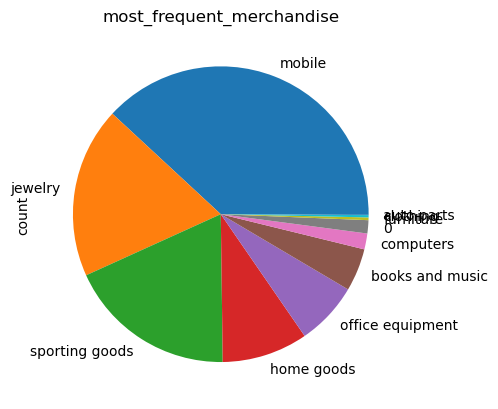

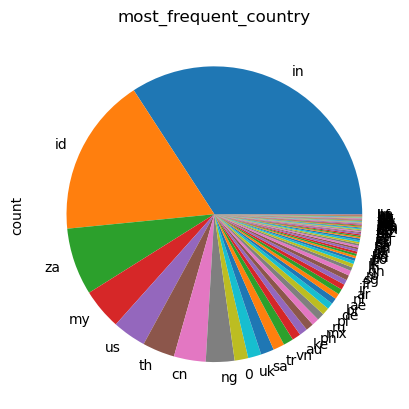

In [14]:
plt.figure()
plt.title('most_frequent_merchandise')
train['most_frequent_merchandise'].value_counts().plot.pie()
plt.figure()
plt.title('most_frequent_country')
train['most_frequent_country'].value_counts().plot.pie()

# Relations Features/Target
## Quantitatives Features

In [15]:
train.dtypes

bidder_id                     object
payment_account               object
address                       object
outcome                        int64
total_bids                     int64
unique_auctions                int64
avg_time_between_bids        float64
most_frequent_merchandise     object
most_frequent_country         object
unique_device_ratio          float64
dtype: object

## outcome / total_bids

<Axes: xlabel='outcome', ylabel='total_bids'>

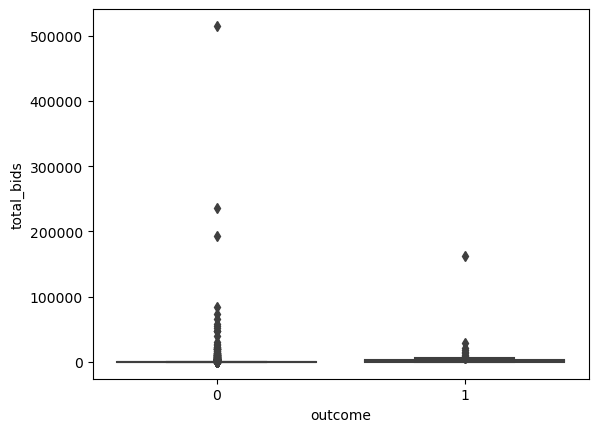

In [16]:
sns.boxplot(x='outcome',y='total_bids',data=train)

In [17]:
train['total_bids'].max()

515033

## outcome / unique_auctions

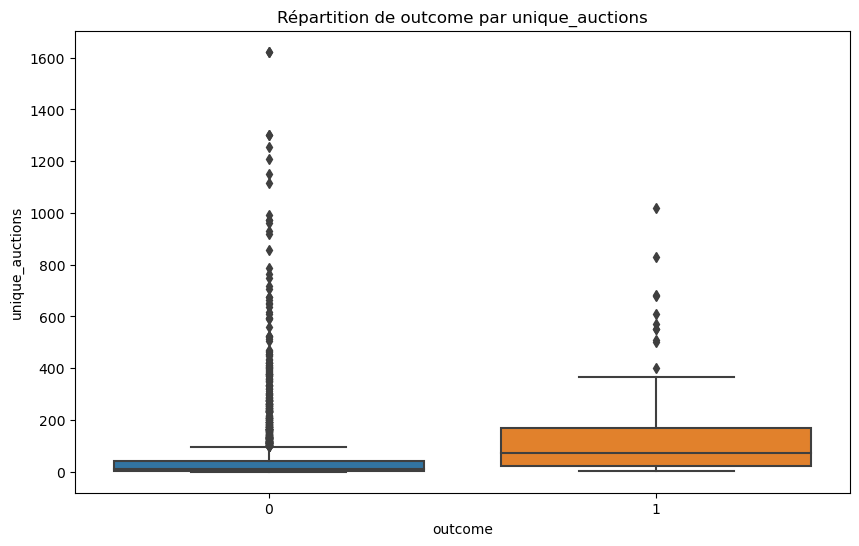

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='outcome',y='unique_auctions',data=train)
plt.title('Répartition de outcome par unique_auctions')
plt.show()

## outcome / avg_time_between_bids        

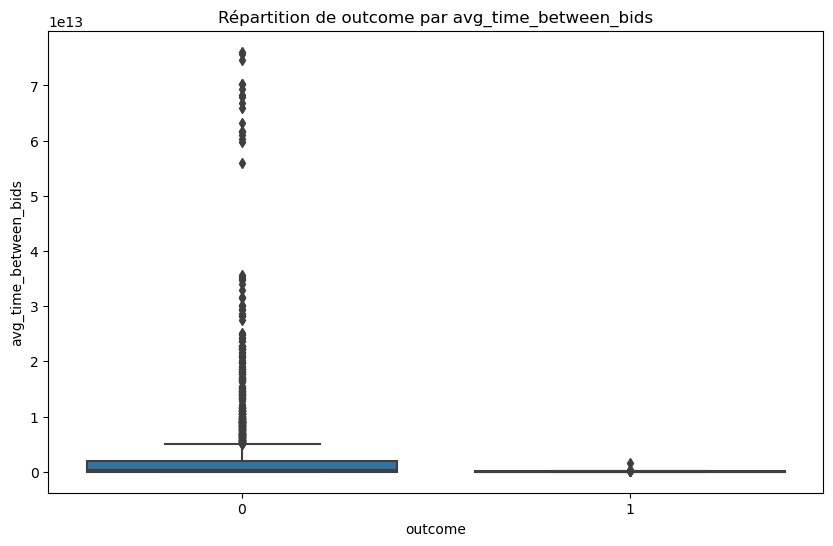

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='outcome',y='avg_time_between_bids',data=train)
plt.title('Répartition de outcome par avg_time_between_bids')
plt.show()

In [20]:
Q1 = train['total_bids'].quantile(0.25)
Q3 = train['total_bids'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
outliers = train[(train['total_bids'] < lower_bound) | (train['total_bids'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Nombre de valeurs aberrantes (IQR) : {num_outliers}")

Nombre de valeurs aberrantes (IQR) : 342


In [24]:
Q1 = train['total_bids'].quantile(0.25)
Q3 = train['total_bids'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des valeurs aberrantes
filtered_train = train[(train['total_bids'] >= lower_bound) & (train['total_bids'] <= upper_bound)]


<Axes: xlabel='outcome', ylabel='total_bids'>

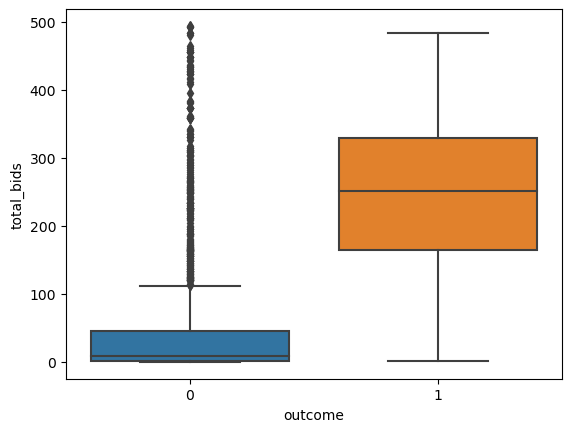

In [25]:
sns.boxplot(x='outcome',y='total_bids',data=filtered_train)

In [26]:
filtered_train.shape

(1671, 10)

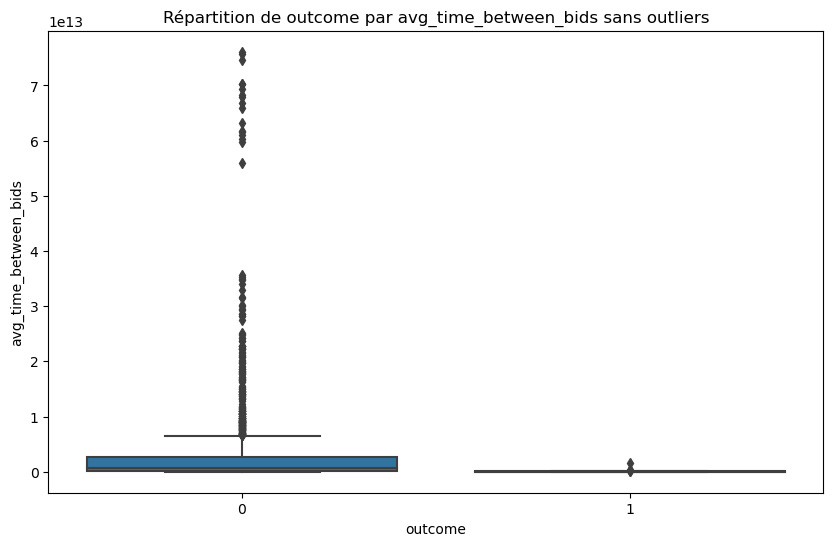

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='outcome',y='avg_time_between_bids',data=filtered_train)
plt.title('Répartition de outcome par avg_time_between_bids sans outliers')
plt.show()

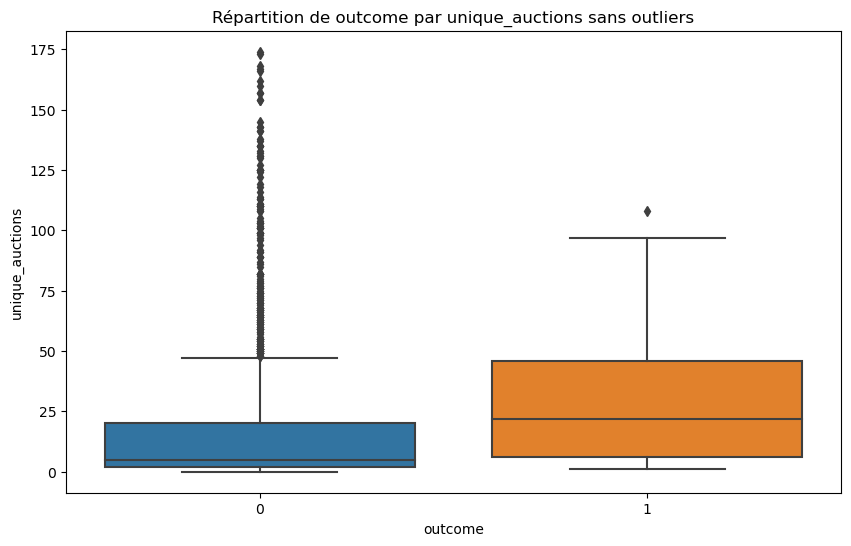

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='outcome',y='unique_auctions',data=filtered_train)
plt.title('Répartition de outcome par unique_auctions sans outliers')
plt.show()

# Qualitatives features
## outcome / most_frequent_merchandise

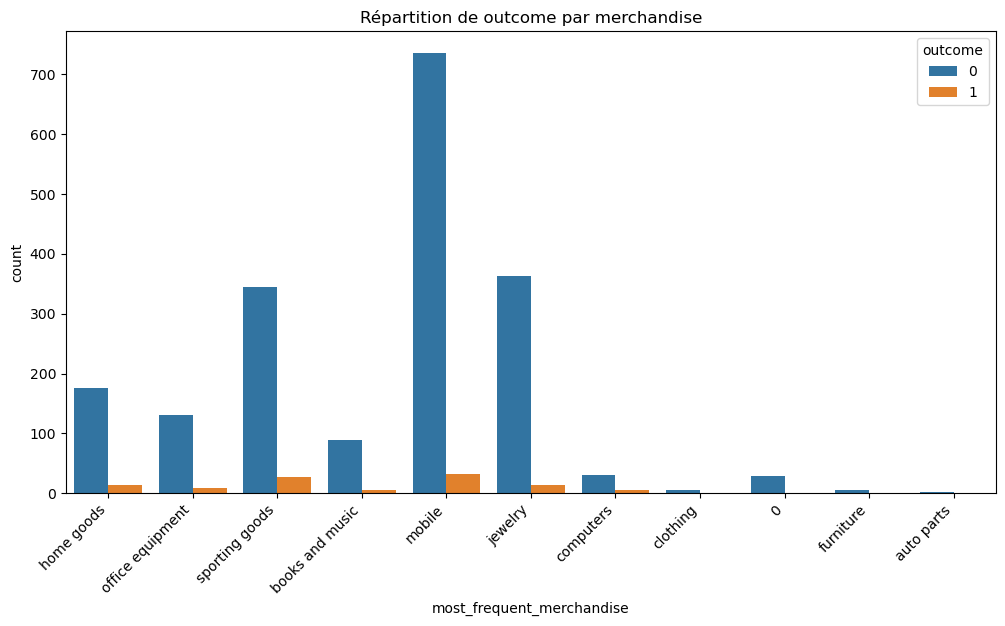

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='most_frequent_merchandise',hue='outcome',data=train)
plt.title('Répartition de outcome par merchandise')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

## outcome / most_frequent_country

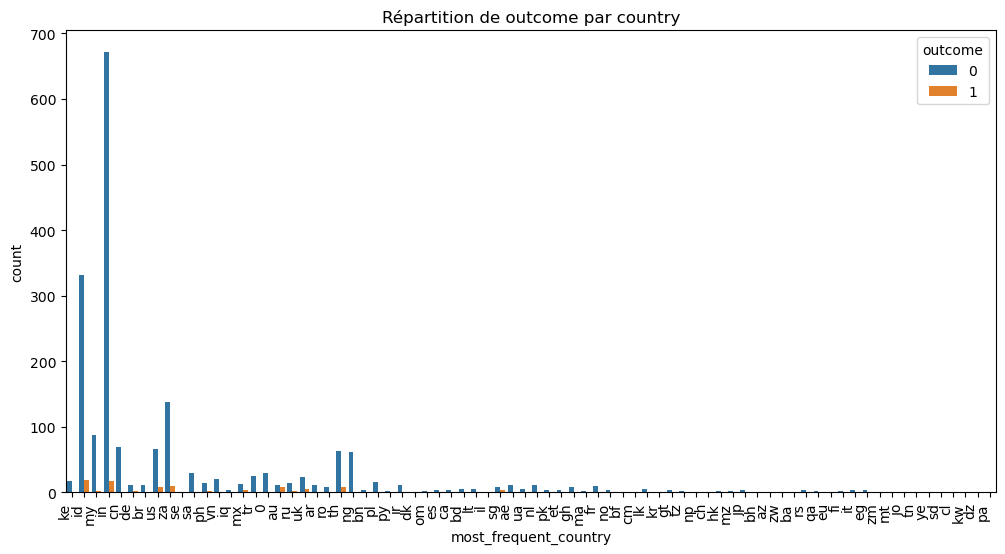

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='most_frequent_country',hue='outcome',data=train)
plt.title('Répartition de outcome par country')
plt.xticks(rotation=90, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

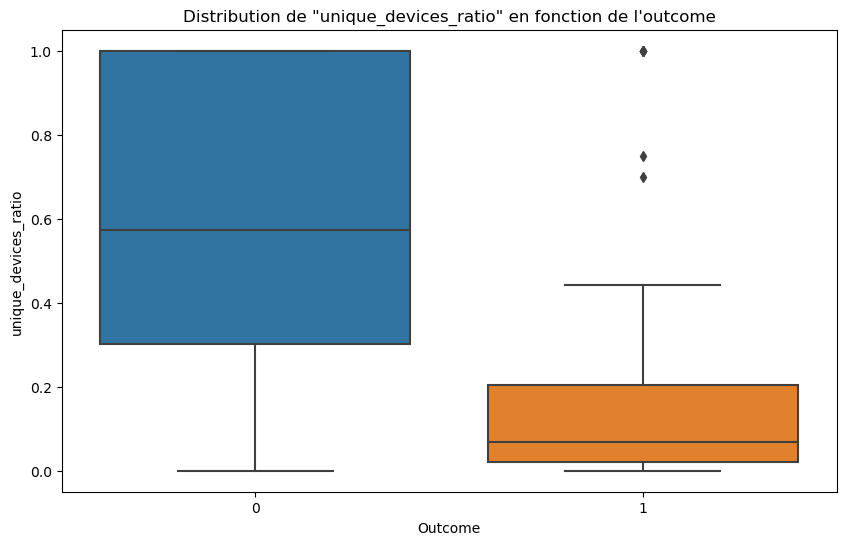

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome',y='unique_device_ratio',data=train)
plt.title('Distribution de "unique_devices_ratio" en fonction de l\'outcome')
plt.xlabel('Outcome')
plt.ylabel('unique_devices_ratio')
plt.show()